## Introducción

Junto con el departamento de marketing de la compañía en cuestión, se ha creado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 
Se deben priorizar estas hipótesis, lanzar un test A/B y analizar los resultados. Para lograr los objetivos se seguirán los siguientes pasos:

__Parte 1. Priorizar hipótesis__

El archivo `hypotheses_us.csv` contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

Acciones a seguir:

- Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

__Parte 2. Análisis de test A/B__

Se realizó un test A/B y los resultados están en los archivos `orders_us.csv` y `visitors_us.csv`.

Analizar el test A/B:

- Representar gráficamente el ingreso acumulado por grupo. Hacer conclusiones y conjeturas.
- Representar gráficamente el tamaño de pedido promedio acumulado por grupo. Hacer conclusiones y conjeturas.
- Representar gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Hacer conclusiones y conjeturas.
- Calcular la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representar gráficamente las tasas de conversión diarias de los dos grupos y describir la diferencia. Sacar conclusiones y hacer conjeturas.
- Trazar un gráfico de dispersión del número de pedidos por usuario. Hacer conclusiones y conjeturas.
- Calcular los percentiles 95 y 99 para el número de pedidos por usuario. Definir el punto en el cual un punto de datos se convierte en una anomalía.
- Trazar un gráfico de dispersión de los precios de los pedidos. Hacer conclusiones y conjeturas.
- Calcular los percentiles 95 y 99 de los precios de los pedidos. Definir el punto en el cual un punto de datos se convierte en una anomalía.
- Encontrar la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Hacer conclusiones y conjeturas.
- Encontrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Hacer conclusiones y conjeturas.
- Encontrar la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Hacer conclusiones y conjeturas.
- Encontrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Hacer conclusiones y conjeturas.
- Tomar una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
    - 1. Parar la prueba, considerar a uno de los grupos como líder. 
    - 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 
    - 3. Continuar la prueba.

### Descripción de datos

__Datos utilizados en la primera parte del proyecto__

`/datasets/hypotheses_us.csv` , Archivo que contiene una lista de hipótesis pendientes de probar con sus respectivos parámetros.

- `Hypotheses`: breves descripciones de las hipótesis
- `Reach`: alcance del usuario, en una escala del uno a diez
- `Impact`: impacto en los usuarios, en una escala del uno al diez
- `Confidence`: confianza en la hipótesis, en una escala del uno al diez
- `Effort`: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

__Datos utilizados en la segunda parte del proyecto__

`/datasets/orders_us.csv`

- `transactionId`: identificador de pedido
- `visitorId`: identificador del usuario que realizó el pedido
- `date`: fecha del pedido
- `revenue`: ingresos del pedido
- `group`: el grupo del test A/B al que pertenece el usuario

`/datasets/visits_us.csv`

- `date`: la fecha
- `group`: grupo del test A/B
- `visits`: el número de visitas en la fecha especificada para el grupo de test A/B especificado

## Pre-análisis de los datos

Antes de comenzar a trabajar con los datos, necesitamos hacer los preparativos necesarios para que todo resulte como esperamos.

### Importación de librerías

Comenzamos importando todas las librerías y módulos que se necesitarán para llevar a cabo el proyecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import math as mt
import datetime as dt

Se importan exitosamente todas las librerias necesarias.

### Carga de datos

Ahora, procedemos a importar los datos necesarios tanto para la parte 1, como para la parte 2. Comenzando con el dataset que contiene información sobre las hipótesis a probar (parte 1).

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Se importa el dataset y se descubre que está separado por `';'`, se corrige y carga correctamente. 

Continuamos con el primer dataset de la parte 2.

In [3]:
orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Se importa el dataset y se optimiza el tipo de dato de la columna `date` a datetime64 para facilitar el trabajo posterior, se observa que no hay valores ausentes.

Finalizamos con el segundo dataset de la parte 2.

In [4]:
visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Se importa el dataset y se optimiza el tipo de dato de la columna `date` a datetime64 para facilitar el trabajo posterior, no se observan valores ausentes.

### Valores duplicados

Buscaremos duplicados explícitos en el dataset.

In [5]:
print(orders.duplicated().sum())
print()
print(visits.duplicated().sum())

0

0


No se encuentran valores ausentes ni duplicados.

## Primera parte: Priorizar hipótesis

Una vez realizado el pre-análisis, estamos listos para comenzar con el proyecto. Comenzamos con la primera parte, analizando las hipótesis mediante el framework ICE.

### Framework ICE

Comenzamos aplicando la fórmula para calcular la prioridad de cada hipótesis y finalmente ordenamos en forma descendente. 

In [6]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
ice = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
ice

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Para ilustrar mejor la jerarquía construiremos un gráfico de barras.

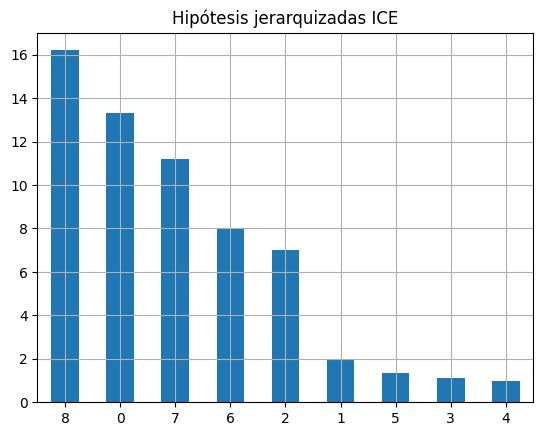

In [7]:
ice.plot(kind='bar', legend=False, rot=0, grid=True, title='Hipótesis jerarquizadas ICE');

In [8]:
print('Hipótesis 8:', ice.loc[8, 'Hypothesis'])
print('Hipótesis 0:', ice.loc[0, 'Hypothesis'])
print('Hipótesis 7:', ice.loc[7, 'Hypothesis'])

Hipótesis 8: Launch a promotion that gives users discounts on their birthdays
Hipótesis 0: Add two new channels for attracting traffic. This will bring 30% more users
Hipótesis 7: Add a subscription form to all the main pages. This will help you compile a mailing list


Según el framework `ICE` la hipótesis que trata sobre el __lanzamiento de promoción con descuento por cumpleaños sería la más importante a comprobar__.

### Framework RICE

Ahora pasamos al framework RICE, que suma el parámetro `Reach` a la ecuación anterior.

In [9]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
rice = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
rice

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


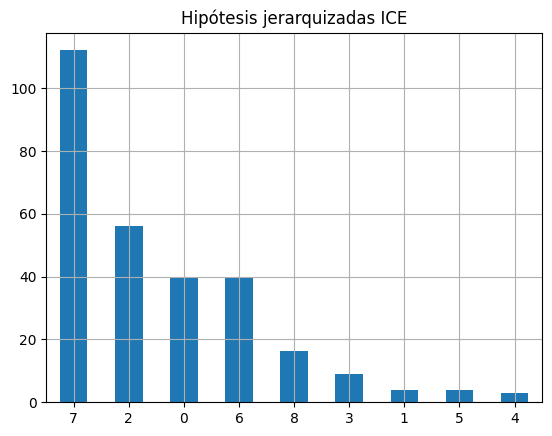

In [10]:
rice.plot(kind='bar', legend=False, rot=0, grid=True, title='Hipótesis jerarquizadas ICE');

In [11]:
print('Hipótesis 7:', rice.loc[7, 'Hypothesis'])
print('Hipótesis 2:', rice.loc[2, 'Hypothesis'])
print('Hipótesis 0:', rice.loc[0, 'Hypothesis'])
print('Hipótesis 6:', rice.loc[6, 'Hypothesis'])

Hipótesis 7: Add a subscription form to all the main pages. This will help you compile a mailing list
Hipótesis 2: Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
Hipótesis 0: Add two new channels for attracting traffic. This will bring 30% more users
Hipótesis 6: Show banners with current offers and sales on the main page. This will boost conversion


Según el framework `RICE` la hipótesis que trata sobre __añadir un formulario de suscripción en las páginas principales sería la más importante a comprobar__.

### Conclusión primera parte

La diferencia de resultados entre los framework __se debe al parámetro `Reach` que refiere al alcance que dicha acción tendría entre los usuarios, a diferencia de `ICE`, `RICE` considera esto dentro de la ecuación__. Es por eso que las hipótesis más importantes de este framework son optimizaciones globales a la web, alcanzando a todos los usuarios que interactúen con ella, en cambio las prioridades de `ICE` son potencialmente muy efectivas, como el descuento por cumpleaños y crear nuevos canales de tráfico, pero en alcance quedan por detrás de las anteriores.

## Parte 2: Análisis Test A/B

Ya podemos comenzar a desarrollar el test A/B.

### Ingreso acumulado por grupo

Para poder graficar el ingreso acumulado se debe construir un dataframe con la información acumulada en el tiempo, el primer paso para esto es crear una matriz con valores únicos de parejas fecha-grupo.

In [12]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Ahora usando la matriz creada recientemente, agruparemos las compras y las visitas acumuladas por fecha.

In [13]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                        .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                        .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

Mediante este extenso código se extrajeron los valores del dataset `orders` que tienen una fecha menor o igual que `datesGroups` y que coinciden con el grupo, y mediante cálculos hechos dentro de la función `.agg()` se obtuvo el numero de pedidos acumulado y el monto acumulado gastado por cliente, mediante una división entre estos datos se calculó el tamaño promedio de pedido por cliente.

Algo similar se hizo con dataset `visits` para calcular el número de visitas acumulado. Ahora debemos combinar los dos conjuntos de datos creados en uno solo.

In [14]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


Mediante el `.merge()` se obtiene un nuevo dataset `cumulativeData` con el número de pedidos, clientes, monto gastado y visitantes por día y grupo.

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
cumulativeRevenueA.head(5)

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109


Mediante filtrado se separa `CumulativeData` en dos datasets separados por grupo y se rescatan las columnas necesarias para construir el gráfico de ingreso acumulado.

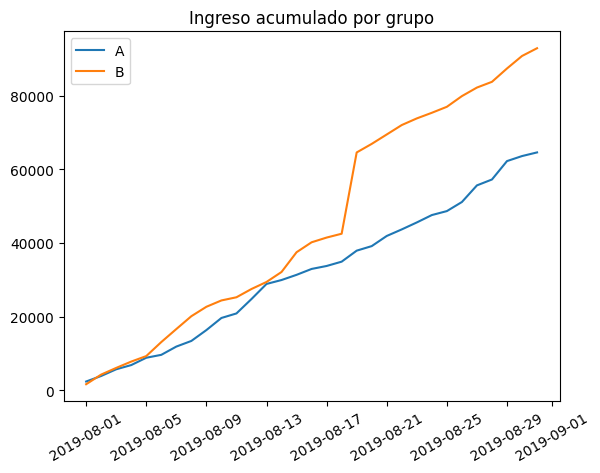

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Ingreso acumulado por grupo')
plt.xticks(rotation=30)
plt.legend();

El ingreso acumulado sube constantemente en ambos grupos, sin embargo se obserban picos en ambas líneas, lo que quiere decir que hay pedidos extremadamente caros o aumentos repentinos en el número de compras. __El grupo B se observa claramente superior al grupo A__, pero se debe ser indagando y considerar los factores mencionados anteriormente.

### Pedido promedio acumulado por grupo

Mediante la división entre el gasto total y el número de pedidos se obtiendrá el monto promedio de cada pedido.

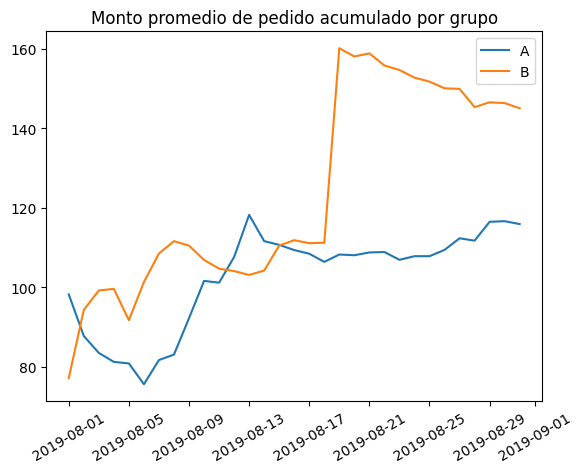

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.title('Monto promedio de pedido acumulado por grupo')
plt.xticks(rotation=30)
plt.legend();

__Se observa al grupo B superior al A__, sin embargo en este gráfico tambián se observan picos irregulares, lo que puede indicar valores atípicos muy grandes en el registro, se observa que la fecha en que se dispara el grupo B es la misma que en el gráfico anterior, esto indica que en esta fecha se realizó un (o más) pedido demasiado elevado en precio que deberá ser filtrado más adelante para un correcto análisis del experimento.

### Diferencia relativa de pedido promedio acumulado para el grupo B en comparación con el grupo A

Visualizar la diferencia relativa en este campo puede ayudarnos a detectar más fácilmente la presencia de outliers en los montos de los pedidos. Mediante un `.merge()` se juntarán ambos `cumulativeRevenue` y se les agregarán sufijos `A` y `B` a las columnas, lo que permitirá hacer las divisiones correspondientes para aplicar la formula de la diferencia relativa.

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head(5)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


Ya estamos listos para aplicar la formula y construir el gráfico.

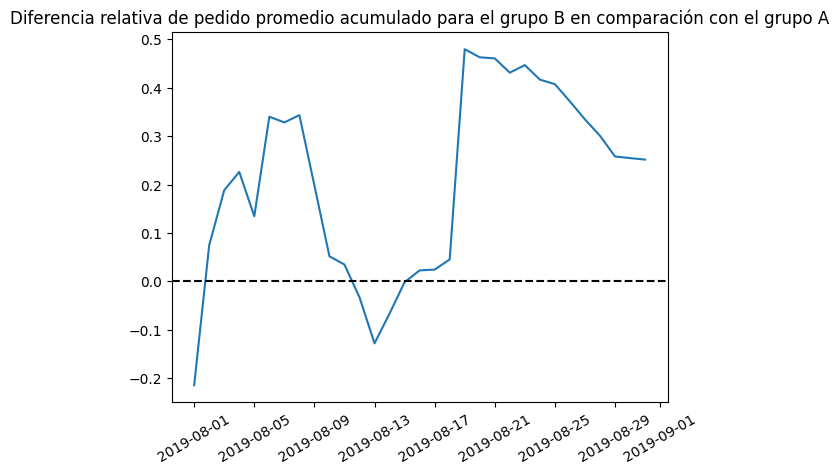

In [19]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) -1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferencia relativa de pedido promedio acumulado para el grupo B en comparación con el grupo A')
plt.xticks(rotation=30);

Las variaciones repentinas entre la línea puntada y la línea del gráfico demuestran que __efectivamente hay valores atípicos influyendo en la medición__, deberán ser filtrados más adelante.

### Tasa de conversión diaria por grupo

Mediante una división entre el número de visitantes y de compradores se puede calcular la conversión acumulada, luego mediante filtros se separará por grupos para ser visualizada.

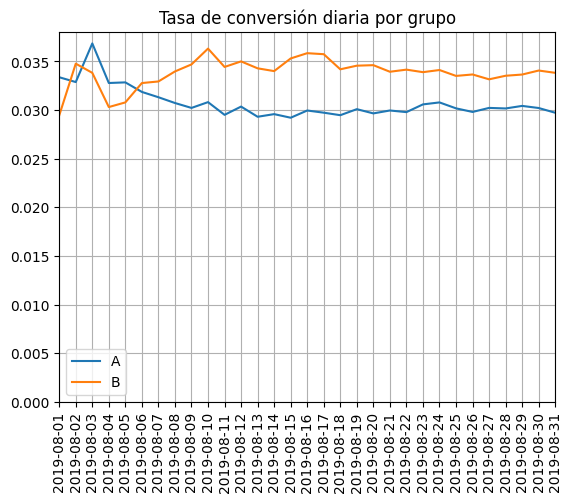

In [20]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors'] #Cálculos
cumulativeData['date'] = cumulativeData['date'].astype('datetime64').dt.strftime('%Y-%m-%d')
cumulativeDataA = cumulativeData[cumulativeData['group'] =='A']
cumulativeDataB = cumulativeData[cumulativeData['group'] =='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A') #Visualización
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid(True)
plt.title('Tasa de conversión diaria por grupo')
plt.legend()
plt.axis(['2019-08-01', '2019-08-31', 0, 0.038])
plt.xticks(rotation=90);

En la tasa de conversión podemos apreciar claramente que __el grupo B se estabiliza por sobre el grupo A__ a partir del sexto día del experimento. 

### Diferencia relativa para la tasa de conversión acumulada para el grupo B en comparación con el grupo A

Al igual que en el caso del monto de los pedidos, graficar la diferencia relativa en las tasas de conversión nos ayuda a cuantificar con mayor exactitud las diferencias entre dichas tasas. Para comenzar, se crea `mergedCumulativeConversions` que es un registro de la tasa de conversión acumulada de cada grupo por día.

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head(5)

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Con el dataset creado, aplicamos la formula y construímos el gráfico.

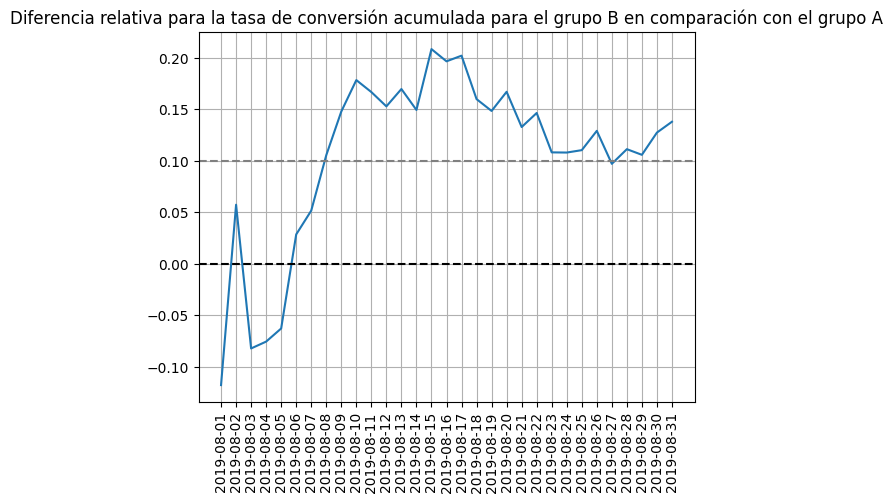

In [22]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] -1)
plt.title('Diferencia relativa para la tasa de conversión acumulada para el grupo B en comparación con el grupo A')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--')
plt.xticks(rotation=90);

Después de unos 9 días de empezada la prueba se tienden a estabilizar las tasas de conversión, __siendo la del grupo B por lo bajo un 10% superior a la del grupo A__, el gráfico también muestra que esto iría al alza.

### Dispersión del número de pedidos por usuario

Mediante un gráfico de dispersión y el cálculo de percentiles extremos se pueden encontrar los valores atípicos que podrían afectar el análisis del test. Para poder generar el gráfico se creará `ordersByUsers` que es un dataset con el número de pedidos de cada cliente.

In [23]:
orders['date'] = orders['date'].astype('datetime64').dt.strftime('%Y-%m-%d')
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head(5)

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


Una vez listo el dataset, procedemos a construir el gráfico de dispersión.

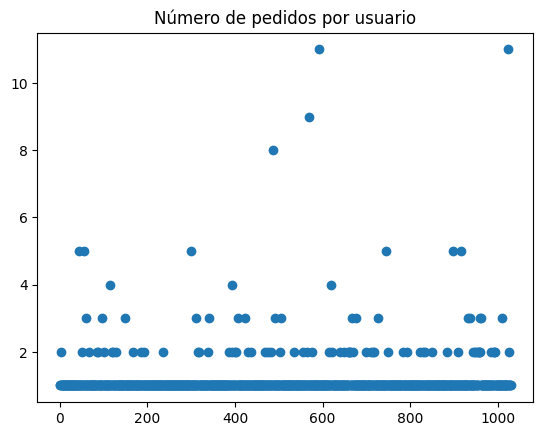

In [24]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Número de pedidos por usuario');

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Después de observar el gráfico y el cálculo de los percentiles 95 y 99 del número de pedidos por cliente, __se considerará como usuario atípico todo el que supere los 3 pedidos__. Se observan valores atípicos muy altos, confirmando la teoría planteada anteriormente.

### Dispersión de los precios de los pedidos

De la misma forma usada con el número de pedidos por usuario, se calcularán los outliersn para los precios de los pedidos. Esta vez, comenzamos con el gráfico.

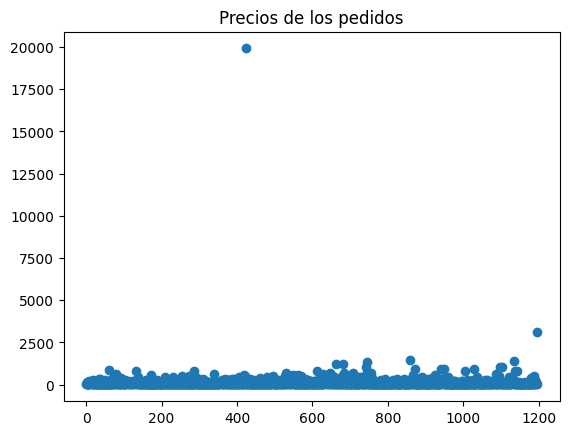

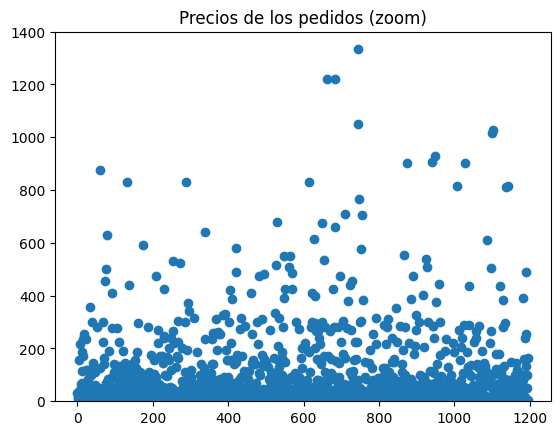

In [26]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title('Precios de los pedidos')
plt.show()
plt.scatter(x_values, orders['revenue'])
plt.title('Precios de los pedidos (zoom)')
plt.ylim(0, 1400);

Se observan valores atípicos extremadamente altos, tanto, que se tuvo que imprimir nuevamente el gráfico con el eje y recortado. Pasamos ahora al cálculo de percentiles extremos.

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


Después de observar el gráfico y el cálculo de los percentiles 95 y 99 del precio de los pedidos, __se considerará como usuario atípico todo el que haga pedidos por sobre los 600 dólares__. Se observan valores atípicos muy altos, confirmando la teoría planteada anteriormente.

### Significancia estadística de la diferencia en la conversión entre los grupos (datos sin filtrar)

Para comenzar con el cálculo requerido el primer paso es crear datasets para el número de pedidos por cliente, uno para cada grupo.

In [28]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

ordersByUsersA.head(5)

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


Ahora, se creará un dataset `sample` para cada grupo, que será una lista donde cada elemento es el número de pedidos realizados por cierto usuario, incluidos los ceros. Aplicando la función `.mean()` se podrá calcular fácilmente la tasa de conversión para cada grupo.

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'], 
                     pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], 
                     pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')], axis=0)

sampleA.head(5)

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Una vez listos los `sample` podemos calcular la significacia estadística y la diferencia relativa del grupo B en relación al grupo A.

In [30]:
alpha = .05
result = st.mannwhitneyu(sampleA, sampleB)[1]
print('valor p:', result)
if result < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print()
difference = sampleB.mean()/sampleA.mean()-1
print('Diferencia relativa del grupo B en relación al grupo A:' ,'{0:.2%}'.format(difference))

valor p: 0.016792355056752608
Rechazamos la hipótesis nula

Diferencia relativa del grupo B en relación al grupo A: 13.81%


Según los datos sin procesar, hay una diferencia estadísticamente significativa y se rechaza la hipótesis nula, ya que el valor p es menor a 0.05. Dicha diferencia sería en favor del grupo B, ya que la segunda salida muestra una __ventaja relativa del grupo B, siendo un 13.8% superior al grupo A en la tasa de conversión__.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos (datos sin filtrar)

Usando el mismo método que en el item anterior, realizaremos la prueba estadística y calcularemos la diferencia relativa del grupo B frente a l grupo A.

In [31]:
alpha = .05
result = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]
print('valor p:', result)
if result < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print()
difference = orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() -1
print('Diferencia relativa del grupo B en relación al grupo A:' ,'{0:.2%}'.format(difference))

valor p: 0.6915246773264736
No podemos rechazar la hipótesis nula

Diferencia relativa del grupo B en relación al grupo A: 25.17%


El valor p es notablemente superior a 0.05 por lo que __no hay motivo para rechazar la hipótesis nula__ y concluir que el tamaño medio de los pedidos difiere entre los grupos. No obstante, el tamaño de pedido promedio para el grupo B es un 25.17% más grande que el del grupo A, esto se debe a que la prueba estadística aplicada (Mann-Whitney) realiza una comparación basada diferencia de intervalos y no en valores medios como la prueba t, entonces los valores atípicos detectados anteriormente influyen poco en los resultados de la prueba.

### Significancia estadística de la diferencia en la conversión entre los grupos (datos filtrados)

Repetiremos la prueba estadística para las tasas de conversión, pero esta vez lo debemos filtrar los outliers primero.

In [32]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 600]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print('Usuarios atípicos:' ,abnormalUsers.shape[0])
print('{0:.2%} del total'.format(abnormalUsers.shape[0] / len(ordersByUsers)))

Usuarios atípicos: 40
3.88% del total


Se crea `abnormalUsers` que es una combinación de dos filtros para eliminar valores atípicos mediante el filtrado de usuarios que hayan hecho más de 3 pedidos o que hayan hecho al menos un pedido de más de 600 dólares. Una constituído el filtro se puede apreciar que __existen 40 usuarios que serán filtrados__.

In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Mediante filtrado lógico se extrajeron estos usuarios de los datasets `sample` para realizar la prueba nuevamente.

In [34]:
alpha = .05
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
if result < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print()
difference = sampleBFiltered.mean()/sampleAFiltered.mean()-1
print('Diferencia relativa del grupo B en relación al grupo A:' ,'{0:.2%}'.format(difference))

No podemos rechazar la hipótesis nula

Diferencia relativa del grupo B en relación al grupo A: 14.33%


__Los resultados se mantienen, Se rechaza la hipótesis nula en favor del grupo B, con una difierencia relativa del 14.3%__ porcentaje muy parecido al 13.8% de los datos sin filtrar.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos (datos filtrados)

Repetiremos la prueba estadística para el tamaño promedio, pero esta vez lo haremos filtrando los outliers.

In [35]:
alpha = .05
results = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
                                          orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
print('valor p:', result)
if result < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
print()
difference = orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1
print('Diferencia relativa del grupo B en relación al grupo A:' ,'{0:.2%}'.format(difference))

valor p: 0.6915246773264736
No podemos rechazar la hipótesis nula

Diferencia relativa del grupo B en relación al grupo A: 5.44%


__Los resultados también se mantienen en este caso, no se puede rechazar la hipótesis nula, sin embargo el grupo B sigue mostrando una ventaja relativa__, solo que en este caso es del 5.4% (mucho menor a la registrada con los datos sin filtrar) lo cual considerando los valores atípicos detectados, es de esperar.

## Conclusión del análisis del test A/B

En este apartado se desarollarán ampliamente todas las conclusiones obtenidas en el desarrollo del experimento, haciendo hincapié en los aspectos fundamentales del trabajo, como lo son: la resolución final del experimento, impacto de elecciones de preprocesamiento y relevancia de los descubrimientos.

### Resolución final del experimento

__Se decide terminar con el test y concluir que el grupo B es el líder, debido a que en absolutamente todas las mediciones es superior al grupo A y, además, se probó estadísticamente (tanto con datos sin filtrar, como filtrados) que tiene una mejor tasa de conversión que el grupo A. En cuanto al tamaño promedio del pedido por grupo, no se pudo rechazar la hipótesis nula, pero si se observa superior en las mediciones relativas__.

### Impacto de elecciones en preprocesamiento

En cuanto a preprocesamiento, la elección que más impacto pudo haber tenido es la de filtrar outliers, en nuestro caso mediante el filtro establecido en: __usuario que supere los tres pedidos registrados o haga al menos un pedido superior a 600 dólares. Se detectaron 40 usuarios anormales, que representaron sólo un 3.88% del total__. En cuanto a las pruebas estadísticas no hubo mayores diferencias entre valores filtrados y sin filtrar.

### Relevancia de los descubrimientos

El experimento demostró que: 
- __El grupo B convierte, por lo bajo, un 14.3% más que el grupo A__ (resultado de prueba con datos filtrados).
- __Los pedidos del grupo B son un 5.44% más caros en precio que los del grupo A__ (resultado de prueba con datos filtrados).

Esto significa que implementar la solución del grupo B va a generar grandes ganancias a la compañía dependiendo del tamaño y el flujo de clientes que tenga, por lo que se debe implementar lo antes posible.